In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from helper_perso import *
%load_ext autoreload
%autoreload 2

In [2]:
data = load_csv_data("data/train.csv")

In [3]:
print(data[0].shape)
print(data[1].shape)
print(data[2].shape)
data[0]
data[2]

(250000,)
(250000, 30)
(250000,)


array([100000, 100001, 100002, ..., 349997, 349998, 349999])

In [4]:
data[0]
mask_boson = data[0] == 1
mask_not_boson = ~ mask_boson
data[0][mask_boson]

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

Looking at the distribution of the features

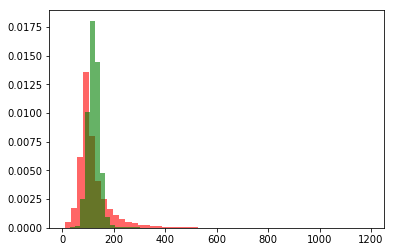

In [5]:
#feature_0
#np.min(data[1][:, 0])
#removing missing data
f = 0
data_boson = data[1][mask_boson]
data_not_boson = data[1][mask_not_boson]

clean_data_boson = data_boson[data_boson[:, f] != -999][:,f]
clean_data_not_boson = data_not_boson[data_not_boson[:, f] != -999][:,f]


p = plt.hist(clean_data_not_boson, bins = 50, alpha=0.6, color = "red", histtype="stepfilled", normed = True)
p = plt.hist(clean_data_boson, bins = 50, alpha=0.6, color = "green", histtype="stepfilled", normed = True)

In [6]:
range_feature(15, data)

Feature 15 range from -3.142 to 3.142


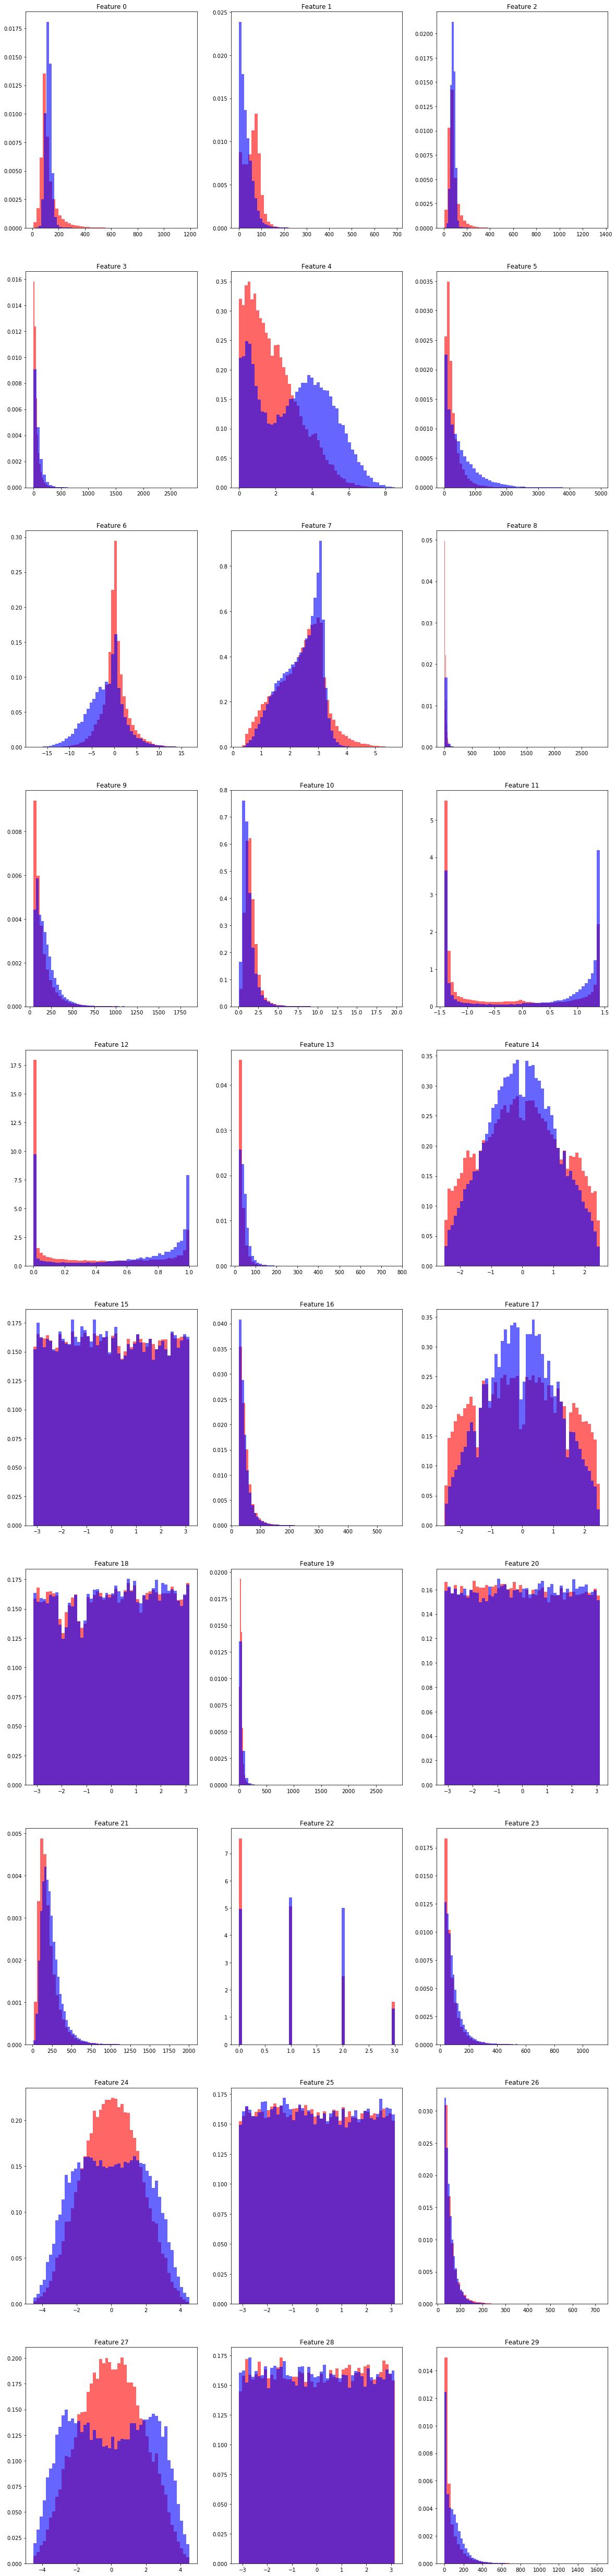

In [7]:
def plot_hist_feature(ax, f, data):
    data_boson = data[1][mask_boson]
    data_not_boson = data[1][mask_not_boson]

    clean_data_boson = data_boson[data_boson[:, f] != -999][:,f]
    clean_data_not_boson = data_not_boson[data_not_boson[:, f] != -999][:,f]

    ax.hist(clean_data_not_boson, bins = 50, alpha=0.6, color = "red", histtype="stepfilled", normed = True)
    ax.hist(clean_data_boson, bins = 50, alpha=0.6, color = "blue", histtype="stepfilled", normed = True)

# plt.style.use('bmh')

fig = plt.figure(figsize=(20, 90))
for i in range(30):
    ax = fig.add_subplot(10, 3, i+1)
    plot_hist_feature(ax, i, data)
    ax.set_title("Feature {i}".format(i=i))
plt.show()

In [22]:
fig.savefig('test2png.png', dpi=100)

In [122]:
interesting_features = [4, 14,17,24,27, 1, 12, 19]
def feature_expands(i,j, data):
    new_col = data[:, i] * data[:, j]
    new_col = np.expand_dims(new_col, axis=1)
    return np.concatenate([data, new_col], 1)

def feature_expands2(i, data):
    new_col = np.log(data[:, i])
    print(new_col)
    new_col = np.expand_dims(new_col, axis=1)
    return np.concatenate([data, new_col], 1)

def feature_expands3(i, data):
    new_col = np.exp(data[:, i])
    print(new_col)
    new_col = np.expand_dims(new_col, axis=1)
    return np.concatenate([data, new_col], 1)

def get_dummies(x, length):
    dum = np.zeros([len(x), length])
    for i in range(len(x)):
        #print(x[i])
        dum[i, x[i]] = 1
    return dum
def add_dummies(i, data):
    dum = get_dummies(data[:,i].astype(int), 4)
    return np.concatenate([data, dum], axis= 1)
def add_is_unkown_value(f, data):
    x = np.zeros(len(data[:,f]))
    x[data[:,f] == -999] = 1
    x = np.expand_dims(x, axis=1)
    return np.concatenate([data, x], axis=1)

def replace_unkown_by_NaN(data):
    d = np.copy(data)
    d[d == -999] = np.nan
    return d
def replace_NaN_by_value(data):
    #for simplicity unkowndata are replaced by the mean but it should be replaced by a random variable following the same probability distribution as the other value (for it's given prediction)
    d = np.copy(data)
    mean = np.nanmean(data, axis = 0)
    var = np.nanvar(data, axis = 0)
    #index = np.where(np.isnan(d))
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if np.isnan(d[i,j]):
                d[i,j] = np.random.normal(mean[j], var[j])
    return d
    
    
def normalize_norm(x):
    var = np.var(x)
    mean = np.mean(x)
    return (x - mean) / var
def normalize_uniform(x):
    return x
def normalize_poisson(x):
    return x

def normalize_crade(X):
    var = np.var(X, axis = 0)
    means = np.mean(X, axis=0)
    vars_ = np.tile(var, (X.shape[0], 1))
    means_ = np.tile(means, (X.shape[0], 1))
    return (X-means_) / vars_

get_dummies([3,2,0,2,1], 4)
add_is_unkown_value(1,np.array([[3,4],[-999,4],[0,3],[2,-999],[1,2]]))

array([[   3.,    4.,    0.],
       [-999.,    4.,    0.],
       [   0.,    3.,    0.],
       [   2., -999.,    1.],
       [   1.,    2.,    0.]])

In [9]:
X = normalize_crade(data[1])
d = replace_unkown_by_NaN(X)
cleaned_data = replace_NaN_by_value(d)

In [10]:
print(data[1].shape)
print(cleaned_data.shape)
#data[1] = cleaned_data

(250000, 30)
(250000, 30)


In [124]:
## test perso
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
reg = [LogisticRegression() for i in range(10)]
#reg = RandomForestClassifier(n_estimators = 10)
X = cleaned_data#data[1] #[:, interesting_features]
y = data[0]
y[mask_not_boson] = 0

#X = data[1]
#X = add_is_unkown_value(4, X)
#X = add_dummies(22, X)

X = feature_expands3(0, X)
train_x, train_y, test_x, test_y = split_data(X, y, 0.8, seed = 9)

idx = []
for i in range(10):
    idx.append(np.random.permutation(range(30))[:20])
    #print(idx[i])
    #print(train_x[:,idx[i]].shape)
    reg[i].fit(train_x[:,idx[i]], train_y)

#print(reg[0].feature_importances_)
#reg[].score(test_x, test_y)
pred = np.zeros(len(test_x))
for i in range(10):
    pred = pred + reg[i].predict(test_x[:,idx[i]])
    #print(pred[40:70])
predf = np.zeros(len(test_x))
predf[pred >=5] = 1
accurency(predf, test_y)

[ 1.00113617  1.0012724   0.99426313 ...,  1.00093602  1.00087234
  0.99426313]


0.72431999999999996

In [127]:
reg[9].score(test_x[:, idx[9]], test_y)

0.71682000000000001

In [54]:
def accurency(y_prediceted, y_label):
    return sum(y_prediceted == y_label)/len(y_label)
def precision(y_prediceted, y_label):
    raise NotImplementedError("Function not implemented")
def recall(y_prediceted, y_label):
    raise NotImplementedError("Function not implemented")
def F1_score(y_prediceted, y_label):
    raise NotImplementedError("Function not implemented")
#accurency((reg.predict(test_x)<0.5).astype(int), test_y)
#precision(2,2)
#_ = plt.hist(reg.predict(test_x), bins = 30)

In [289]:
reg = LinearRegression()
for i in range(30):
    for j in range(30):
        X = data[1] #[:, interesting_features]
        X = feature_expands(i,j,X)
        y = data[0]
        y[mask_not_boson] = 0
        train_x, train_y, test_x, test_y = split_data(X, y, 0.8, seed = 5)
        reg.fit(train_x, train_y)
        sc = accurency((reg.predict(test_x)<0.5).astype(int), test_y) #reg.score(test_x, test_y)
        print("feature {i} with feature {j} got : {sc}".format(i=i, j=j, sc=sc))


feature 0 with feature 0 got : 0.7503212992171983
feature 0 with feature 1 got : 0.7390466175955135
feature 0 with feature 2 got : 0.7492697745063676
feature 0 with feature 3 got : 0.7503797172566888
feature 0 with feature 4 got : 0.7501460450987265
feature 0 with feature 5 got : 0.7502044631382171
feature 0 with feature 6 got : 0.7500876270592359
feature 0 with feature 7 got : 0.7496787007828017
feature 0 with feature 8 got : 0.7479261595980838
feature 0 with feature 9 got : 0.748919266269424
feature 0 with feature 10 got : 0.7469330529267437
feature 0 with feature 11 got : 0.7510223156910855
feature 0 with feature 12 got : 0.7501460450987265
feature 0 with feature 13 got : 0.7512559878490478
feature 0 with feature 14 got : 0.7506133894146513
feature 0 with feature 15 got : 0.7506133894146513
feature 0 with feature 16 got : 0.7465241266503096
feature 0 with feature 17 got : 0.7503212992171983
feature 0 with feature 18 got : 0.7503797172566888
feature 0 with feature 19 got : 0.75195700

In [365]:
def percent_unkown_value(data, f):
    return data[data[:,f] == -999].shape[0] / data.shape[0]

def influance_of_unkowing_the_value(data, f):
    #ATTENTION TO BE COMPARE WITH THE FACT THAT I KNOW THE VALUE
    unkown_label = data[0][data[1][:,f] == -999]
    if len(unkown_label) == 0: return -1
    return sum(unkown_label) / len(unkown_label)
1 - (sum(test_y) / len(test_y))

0.65764

In [362]:
for f in range(30):
    print("feature {f} has a {per}% unkown value".format(f=f, per=percent_unkown_value(data[1], f)*100))   

feature 0 has a 15.245600000000001% unkown value
feature 1 has a 0.0% unkown value
feature 2 has a 0.0% unkown value
feature 3 has a 0.0% unkown value
feature 4 has a 70.9828% unkown value
feature 5 has a 70.9828% unkown value
feature 6 has a 70.9828% unkown value
feature 7 has a 0.0% unkown value
feature 8 has a 0.0% unkown value
feature 9 has a 0.0% unkown value
feature 10 has a 0.0% unkown value
feature 11 has a 0.0% unkown value
feature 12 has a 70.9828% unkown value
feature 13 has a 0.0% unkown value
feature 14 has a 0.0% unkown value
feature 15 has a 0.0% unkown value
feature 16 has a 0.0% unkown value
feature 17 has a 0.0% unkown value
feature 18 has a 0.0% unkown value
feature 19 has a 0.0% unkown value
feature 20 has a 0.0% unkown value
feature 21 has a 0.0% unkown value
feature 22 has a 0.0% unkown value
feature 23 has a 39.9652% unkown value
feature 24 has a 39.9652% unkown value
feature 25 has a 39.9652% unkown value
feature 26 has a 70.9828% unkown value
feature 27 has a 7

In [366]:
for f in range(30):
    print("Unknowing feature {f} given {per}% on the perdiction".format(f=f, per=influance_of_unkowing_the_value(data, f)*100))   

Unknowing feature 0 given 7.438211680747233% on the perdiction
Unknowing feature 1 given -100% on the perdiction
Unknowing feature 2 given -100% on the perdiction
Unknowing feature 3 given -100% on the perdiction
Unknowing feature 4 given 29.980220560473803% on the perdiction
Unknowing feature 5 given 29.980220560473803% on the perdiction
Unknowing feature 6 given 29.980220560473803% on the perdiction
Unknowing feature 7 given -100% on the perdiction
Unknowing feature 8 given -100% on the perdiction
Unknowing feature 9 given -100% on the perdiction
Unknowing feature 10 given -100% on the perdiction
Unknowing feature 11 given -100% on the perdiction
Unknowing feature 12 given 29.980220560473803% on the perdiction
Unknowing feature 13 given -100% on the perdiction
Unknowing feature 14 given -100% on the perdiction
Unknowing feature 15 given -100% on the perdiction
Unknowing feature 16 given -100% on the perdiction
Unknowing feature 17 given -100% on the perdiction
Unknowing feature 18 gi

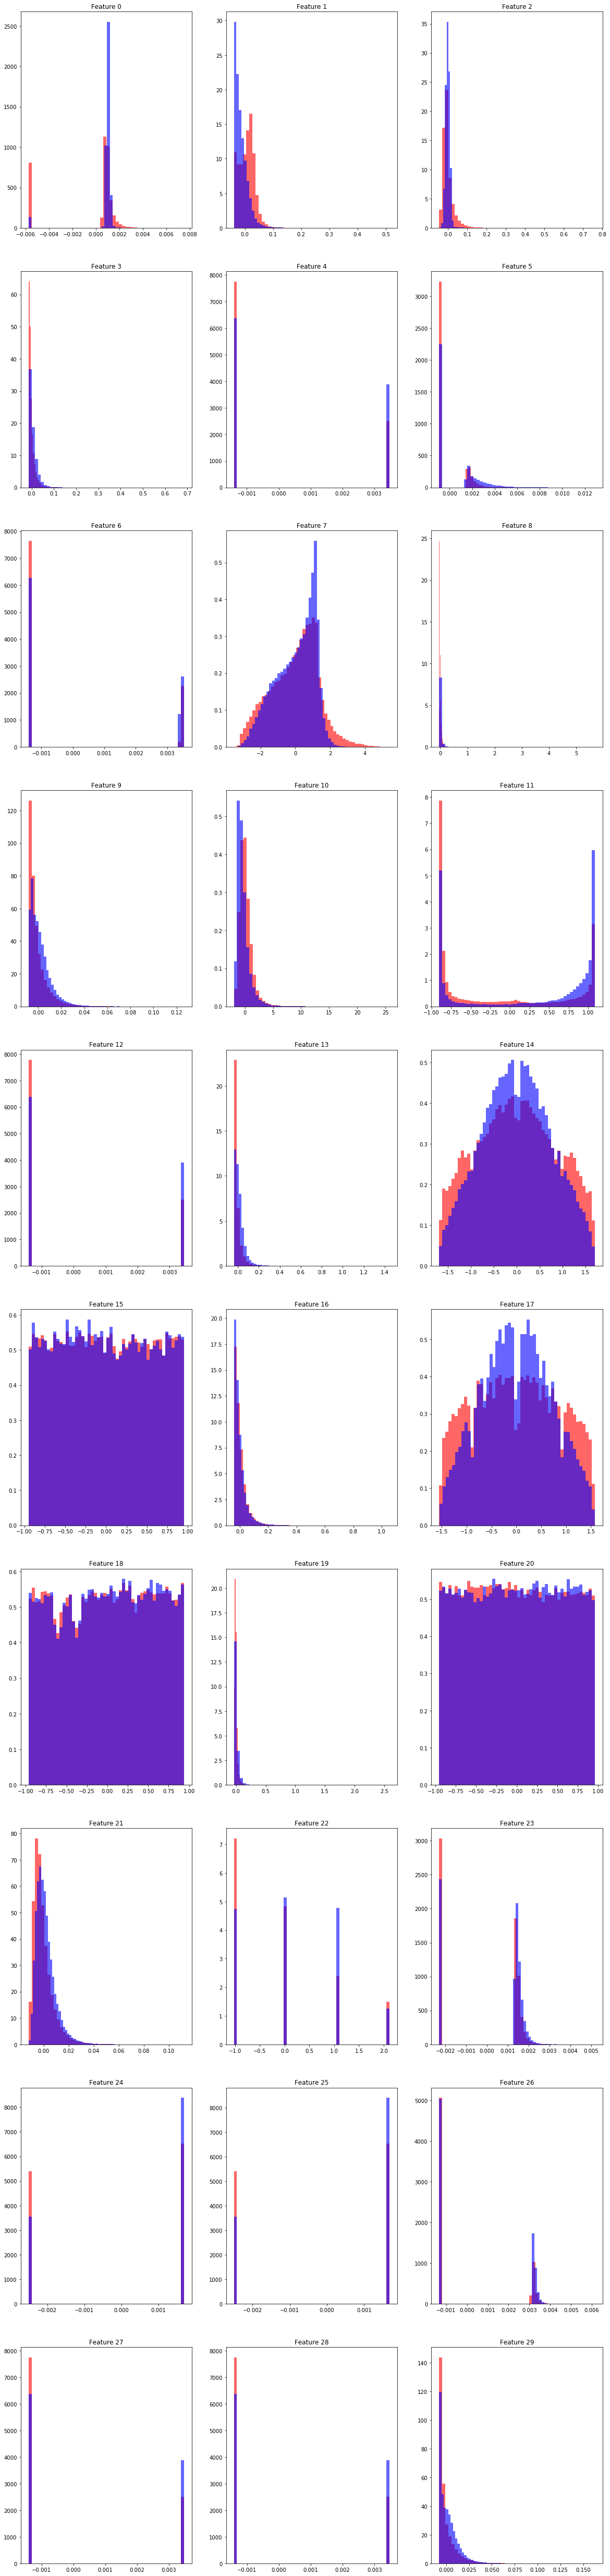

In [454]:
fig = plt.figure(figsize=(20, 90))
for i in range(30):
    ax = fig.add_subplot(10, 3, i+1)
    plot_hist_feature(ax, i, [[],X])
    ax.set_title("Feature {i}".format(i=i))
plt.show()

In [455]:
fig.savefig('afterpreprocessing.png', dpi=100)